# 패키지 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# 데이터 로드

In [2]:
# 데이터불러오기
data_path = './data/apple_quality.csv'

df = pd.read_csv(data_path)

In [3]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


# 데이터 분할(학습/테스트)

In [5]:
# 특성과 타겟 분리
target_column = "Quality"
X = df.drop(columns=[target_column])
# 식별 코드 제거
X = X.drop(columns=["A_id"])

y = df[target_column]

In [6]:
# 원 핫 인코딩
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# 모델 학습

In [8]:
# Logistic Regression 모델 학습
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = log_reg.predict(X_test)

print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

✅ Confusion Matrix:
[[288 103]
 [ 96 313]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       391
           1       0.75      0.77      0.76       409

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



# 모델 평가

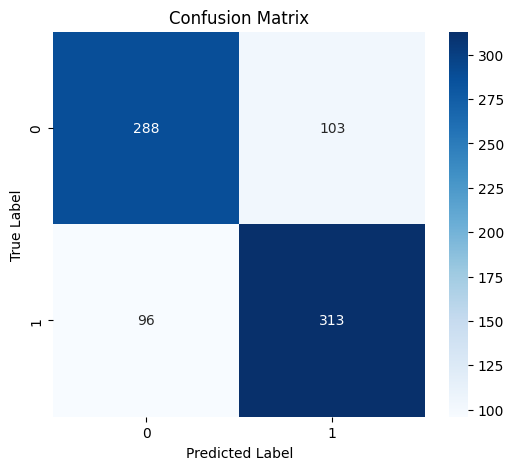

In [9]:
# confusion matrix 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 라벨 (0: bad, 1: good)
labels = sorted(np.unique(y))

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


/var/folders/fr/9ggpn2xx0tz4b2lxj9g94lzr0000gn/T/ipykernel_8576/2682291077.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Weight', y='Feature', palette='coolwarm')


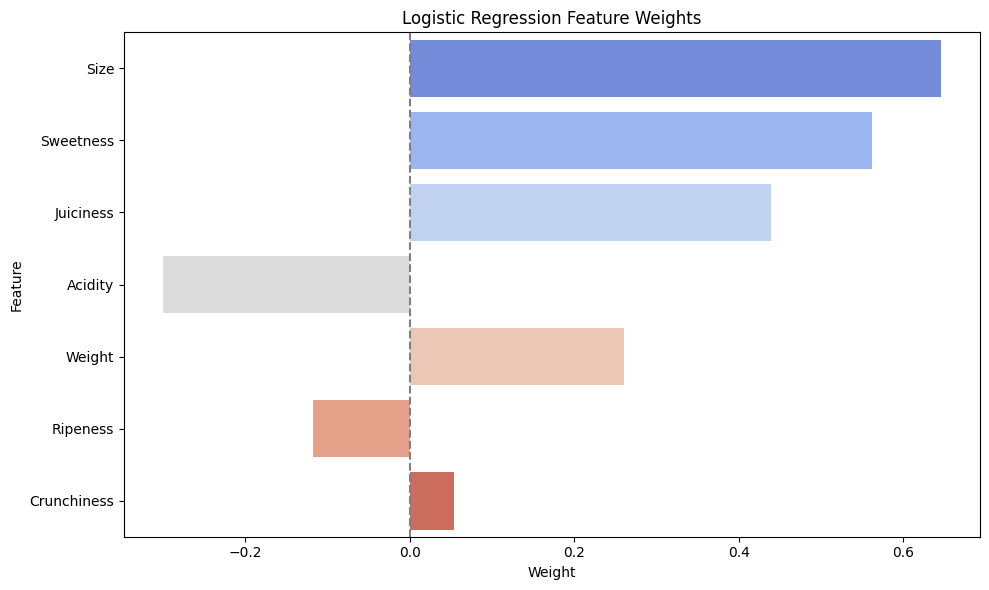

In [10]:
# W 값 가져오기
weights = log_reg.coef_[0]

# 특성 이름 함께 사용
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(len(weights))]

# 데이터프레임으로 정리
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights
}).sort_values(by='Weight', key=abs, ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Weight', y='Feature', palette='coolwarm')
plt.title('Logistic Regression Feature Weights')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
